**senior_tim**: Database with the daily average of senior citizens travelling on road network links based on one year, between April 2019 and March 2020.  
**busroutes**: Identification of road segments that are part of the different bus routes.

**Goals**: To understand the senior citizens' mobility patterns and their characteristics: We aim to provide better conditions of mobility for our senior citizens, giving them the same opportunities to arrive at their points of interest with affordable and accessible public transport.  
**Outcome**: A general model to design an integrated transportation service for the senior population, or, an integrated transportation service for senior population proposal for one city.

In [1]:
import pandas as pd
import fiona
import matplotlib.pyplot as plt

In [3]:
senior_tim = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/pse/Senior_TIM_v1.txt',
                                 encoding = "ISO-8859-1",
                                sep='|')
busroutes = pd.read_csv('https://wdl-data.fra1.digitaloceanspaces.com/pse/BusRoutes.txt',
                                 encoding = "ISO-8859-1",
                                sep='|')
seniors_df = pd.merge(senior_tim, busroutes, on = ['linkid'], how = 'outer')

 - O merge tem 184603 entradas
 - Há len(seniors_df[pd.isnull(seniors_df.IDRoute)])=100098 entradas sem IDRoute (deslocações sem ser de autocarro)?
 - Há 167 busroutes diferentes (incluindo nan)
 - 4 districts of origin: Lisboa,  Setúbal, Porto, Aveiro
 - 2 regions of origin - 'R1 - AM Lisboa, 'R2 - AM Porto'
 - 24 counties of origin

In [85]:
len(concelhos_dict['Aveiro'])

10

In [105]:
for shp in concelhos_shapes:
    if shp['properties']['NAME_2']=='Aveiro':
        print(shp['geometry']['coordinates'][5][1])

IndexError: list index out of range

In [129]:
asa = fiona.open("/home/primity/terras/gadm36_PRT_shp/gadm36_PRT_3.shp")

In [135]:
for shp in asa:
    if shp['properties']['TYPE_3'] != 'Parish':
        print(shp)
        

In [118]:
concelhos_shapes = fiona.open("/home/primity/terras/gadm36_PRT_shp/gadm36_PRT_2.shp")

concelhos_dict = {}
for shp in concelhos_shapes:
    concelhos_dict[shp['properties']['NAME_2']] = shp['geometry']['coordinates'][0]

concelhos_plot = {}
for key, value in concelhos_dict.items():
    concelhos_plot[key] = [[point[0] for point in value], [point[1] for point in value] ]

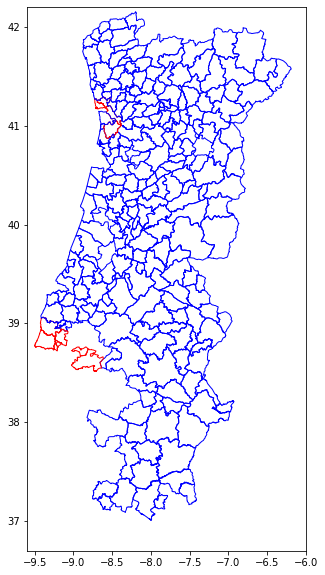

In [117]:
plt.figure(figsize=(5,10))
plt.xlim((-9.6, -6))
plt.ylim((36.7, 42.2))
for name, fr in concelhos_plot.items():
    if name in seniors_df.County_of_Origin.unique():
        c = 'red'
    else:
        c = 'blue'
    plt.plot(fr[0], fr[1], color=c , linewidth=1)
plt.show()

In [53]:
seniors_df.groupby('County_of_Origin')['Average_Daily_SeniorPopulation_Travelling'].mean().sort_values(ascending=False)

County_of_Origin
Maia                    2592.685676
Porto                   1853.670545
Palmela                 1682.594495
Gondomar                1007.366209
Lisboa                   828.232138
Matosinhos               811.815903
Odivelas                 754.966313
Montijo                  741.242802
Cascais                  545.218368
Barreiro                 515.790044
Setúbal                  472.899427
Vila Franca de Xira      460.025017
Sintra                   457.432288
Alcochete                449.138928
Oeiras                   441.723595
Sesimbra                 440.766744
Seixal                   403.714357
Santa Maria da Feira     331.354878
Moita                    310.777968
Mafra                    233.917902
Loures                   228.332742
Amadora                  209.128946
Almada                    64.208721
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

In [52]:
seniors_df.groupby('County_of_Origin')['IDRoute'].nunique().sort_values(ascending=False)

County_of_Origin
Oeiras                  152
Lisboa                  132
Odivelas                120
Barreiro                119
Porto                   110
Seixal                  110
Sintra                  107
Vila Franca de Xira     100
Maia                     99
Cascais                  98
Gondomar                 95
Amadora                  92
Mafra                    81
Palmela                  68
Loures                   51
Almada                   44
Matosinhos               33
Setúbal                  29
Sesimbra                 24
Santa Maria da Feira     16
Montijo                  15
Alcochete                 8
Moita                     0
Name: IDRoute, dtype: int64

In [146]:
route_counties={}
for route in seniors_df.IDRoute.unique():
    temp = seniors_df.dropna()
    route_counties[route] = list(temp[(temp.IDRoute==route)].County_of_Origin.unique())
    print(len(route_counties[route]), end= ' ')

17 10 14 13 14 16 16 14 0 16 14 13 19 13 15 15 15 15 16 18 15 18 17 17 15 16 9 10 14 17 11 20 15 15 15 16 10 9 11 11 14 15 16 11 15 14 9 12 9 15 14 14 15 11 15 15 11 16 12 12 12 14 15 7 11 11 12 10 15 13 13 8 11 11 11 11 11 15 11 14 10 8 14 9 7 1 11 13 2 7 4 9 3 9 10 9 9 3 5 9 7 10 8 10 9 10 9 10 10 7 9 9 10 10 8 10 8 10 6 12 11 9 9 10 11 6 4 4 5 8 9 8 6 7 8 9 8 8 6 9 5 5 8 8 4 4 8 5 6 9 6 7 7 7 6 8 7 5 4 1 7 3 9 9 1 0 0 

In [147]:
route_counties

{8.0: ['Lisboa',
  'Palmela',
  'Oeiras',
  'Vila Franca de Xira',
  'Sintra',
  'Loures',
  'Amadora',
  'Barreiro',
  'Odivelas',
  'Seixal',
  'Montijo',
  'Porto',
  'Mafra',
  'Santa Maria da Feira',
  'Cascais',
  'Almada',
  'Maia'],
 85.0: ['Lisboa',
  'Palmela',
  'Oeiras',
  'Vila Franca de Xira',
  'Sintra',
  'Maia',
  'Barreiro',
  'Seixal',
  'Cascais',
  'Odivelas'],
 6.0: ['Lisboa',
  'Seixal',
  'Odivelas',
  'Sintra',
  'Vila Franca de Xira',
  'Oeiras',
  'Palmela',
  'Mafra',
  'Setúbal',
  'Barreiro',
  'Amadora',
  'Cascais',
  'Loures',
  'Porto'],
 33.0: ['Lisboa',
  'Vila Franca de Xira',
  'Cascais',
  'Amadora',
  'Barreiro',
  'Odivelas',
  'Mafra',
  'Oeiras',
  'Sintra',
  'Seixal',
  'Sesimbra',
  'Palmela',
  'Loures'],
 52.0: ['Lisboa',
  'Seixal',
  'Odivelas',
  'Sintra',
  'Vila Franca de Xira',
  'Oeiras',
  'Palmela',
  'Barreiro',
  'Mafra',
  'Porto',
  'Cascais',
  'Amadora',
  'Loures',
  'Gondomar'],
 9.0: ['Oeiras',
  'Barreiro',
  'Lisboa',


In [8]:
seniors_df.head(2)

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling,IDRoute
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187,8.0
1,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187,85.0


In [ ]:
set(senior_tim.County_of_Origin)

In [ ]:
senior_tim[]

In [ ]:
busroutes.head(2)

In [ ]:
len(set(busroutes.IDRoute)), len(set(busroutes.linkid))

In [ ]:
len(set(senior_tim.linkid))